# Text Classification using Naive Bayes Classifier

In [1]:
# Imports required packages

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)

In [2]:
# Loads both train and test data set without meta data (refer 'remove' parameter)
# to avoid overfitting

newsgroups_train = fetch_20newsgroups(
    subset="train", 
    random_state=42)

newsgroups_test = fetch_20newsgroups(
    subset="test", 
    random_state=42)

In [3]:
# Shows sample counts in data sets
print("Training Sample Count:", len(newsgroups_train.data))
print("Testing Sample Count:", len(newsgroups_test.data))

# Also, prints count of unique category
categories = newsgroups_train.target_names
print("Unique Category Count:", len(categories))

Training Sample Count: 11314
Testing Sample Count: 7532
Unique Category Count: 20


In [4]:
# Checks how document looks like
print(newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [5]:
# Prints uniques categories
print(categories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
# Prints targets of first 10 documents
print(newsgroups_train.target[:10])

[ 7  4  4  1 14 16 13  3  2  4]


In [7]:
# Prints target names for the first 10 documents 
print(
    list(
        map(
            lambda x: newsgroups_train.target_names[x], 
            newsgroups_train.target
        )
    )[:10]
)

['rec.autos', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space', 'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'comp.sys.mac.hardware']


## Modeling

In [8]:
# Creating modeling pipeline
pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Fits the model through pipeline
pipeline.fit(newsgroups_train.data, newsgroups_train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [9]:
# Now, performs predictions on the test documents
predicted_categories = pipeline.predict(newsgroups_test.data)

In [10]:
# Now checks if the prediction on the one of test documents is correct
print(
    "Test Document:", newsgroups_test.data[0], 
    "\nActual Category:", newsgroups_test.target[0], 
    "\nPredicted Category:", predicted_categories[0]
)

Test Document: From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler
 
Actual Category: 7 
Predicted Category: 7


## Model Performance Anallysis

In [11]:
# Prints the mode accuracy
accuracy_score(newsgroups_test.target, predicted_categories)

0.7738980350504514

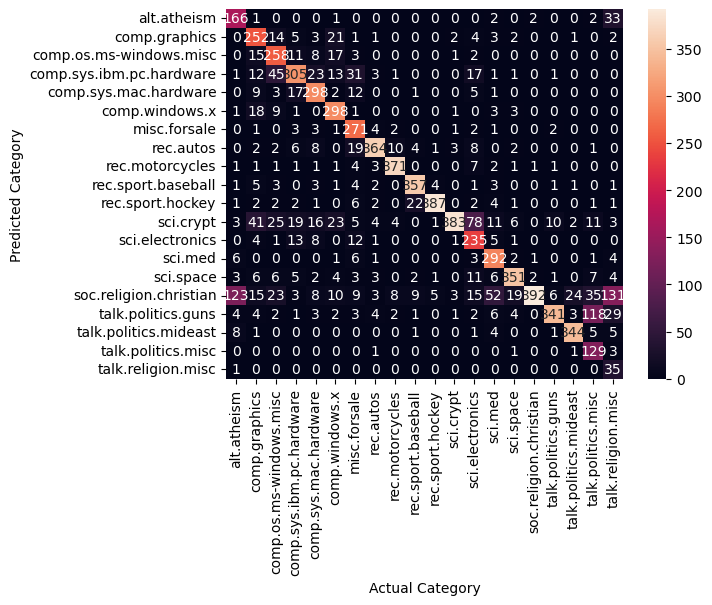

In [12]:
# Shows the Confusion Matrix as heatmap
conf_matrix = confusion_matrix(newsgroups_test.target, predicted_categories)
sns.heatmap(
    conf_matrix.T, 
    #square = True, 
    annot=True, 
    fmt = "d", 
    xticklabels=newsgroups_train.target_names,
    yticklabels=newsgroups_train.target_names)
plt.xlabel("Actual Category")
plt.ylabel("Predicted Category")
plt.show()